<a href="https://colab.research.google.com/github/rhea-renjith/Income-prediction-Exploring-demographic-patterns/blob/main/Income_Prediction_Exploring_demographic_patterns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("adult.csv")

In [ ]:
df.shape

(48842, 15)

In [ ]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

The missing values are denoted by the symbol '?' in the dataset, suggesting that they are unknown or unspecified.








In [ ]:
df[df == '?'] = np.nan
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [ ]:
len(df.loc[ (df['occupation'].isnull()) & ((df['workclass'].isnull()))])

2799

It means wherever workclass is missing, occupation is too.

In [ ]:
df[(df['workclass'].isnull()) & (~df['occupation'].isnull())]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income


In [ ]:
percentage_null_workclass = df['workclass'].isna().sum() / df.shape[0] * 100

percentage_null_occupation = df['occupation'].isna().sum() / df.shape[0] * 100

percentage_null_nativeCountry = df['native-country'].isna().sum() / df.shape[0] * 100

print("percentage of missing values ​​in the workclass column =\t", percentage_null_workclass)
print("percentage of missing values ​​in the occupation column =\t", percentage_null_occupation)
print("percentage of missing values ​​in the native-country column =", percentage_null_nativeCountry)


percentage of missing values ​​in the workclass column =	 5.7307235575938735
percentage of missing values ​​in the occupation column =	 5.751197739650301
percentage of missing values ​​in the native-country column = 1.7546374022357807


The percentage of missing values in each column is calculated as follows:

- Workclass: 5.73%
- Occupation: 5.75%
- Native-country: 1.75%

Insight
- When predicting an individual's income, the most influential factors are typically their occupation and the sector in which they work (workclass).
- In instances where data on workclass is missing, the information on occupation is also absent.
- While other input features may have varying degrees of influence, the absence of crucial data on occupation and workclass in these specific rows implies that removing them wouldn't result in significant data loss, as the key information is already missing.

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

### Data Visualization

In [ ]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


<=50K    37155
>50K     11687
Name: income, dtype: int64


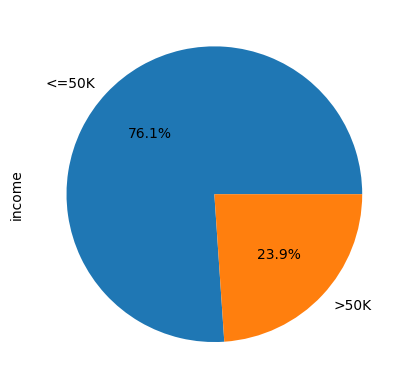

In [ ]:
df['income'].value_counts().plot.pie(autopct= '%1.1f%%')
print(df['income'].value_counts())

 the dataset appears to be imbalanced.

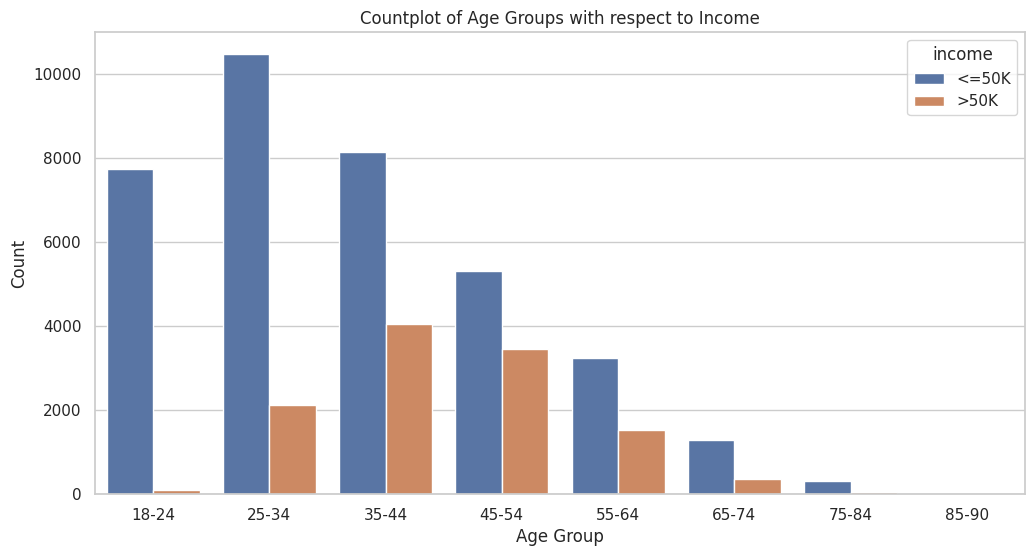

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Create age bins
labels = ["18-24", "25-34", "35-44", "45-54", "55-64", "65-74", "75-84", "85-90"]
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

sns.countplot(x="age_group", hue="income", data=df, order=labels)

plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Countplot of Age Groups with respect to Income")

plt.show()

In the age group 18-24, a greater number of individuals earn less than 50K compared to those earning above 50K, and the difference between the two income categories is substantial. Additionally, the 35-44 age group exhibits a significant proportion of individuals who earn more than 50K.








Lets find out what occupation these intervals do

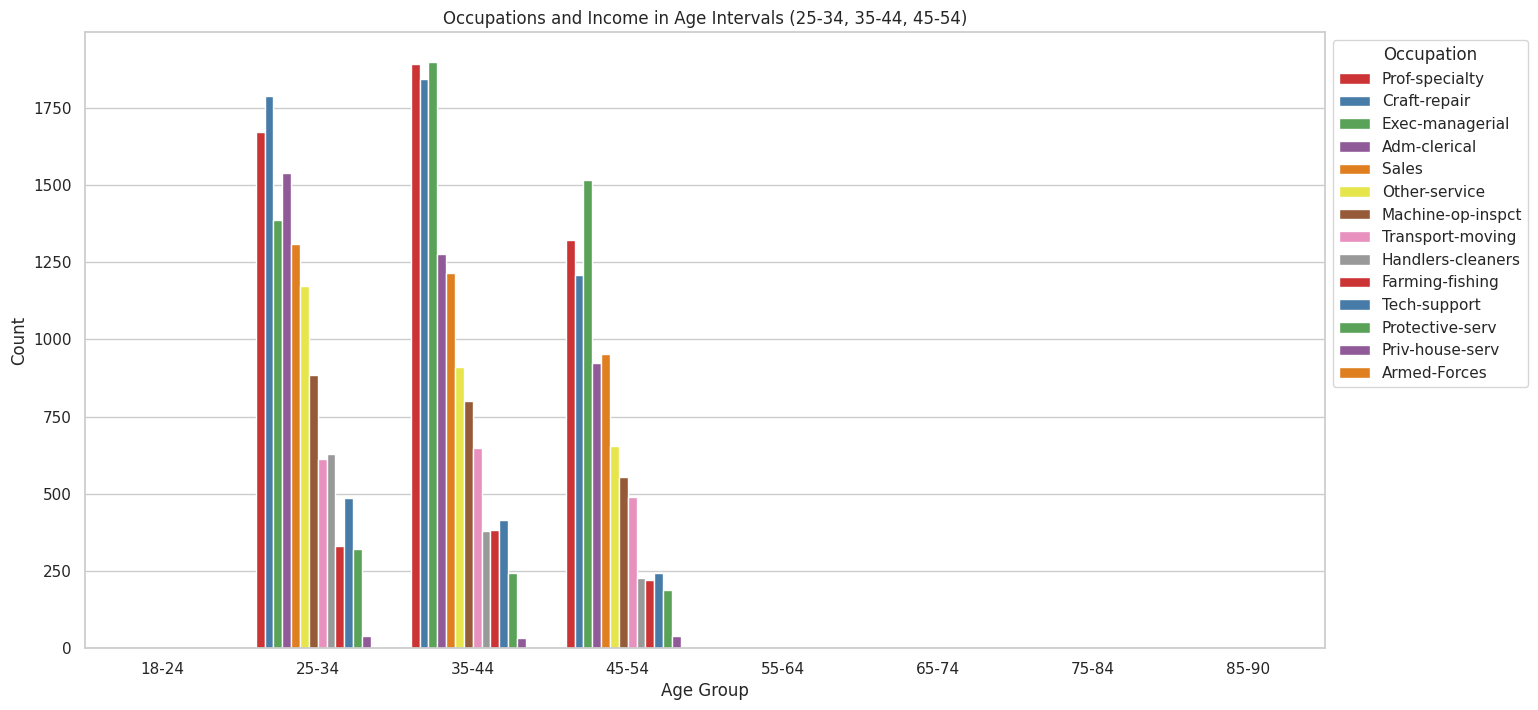

In [ ]:
plt.figure(figsize=(16, 8))

age_intervals = ['25-34', '35-44', '45-54']
df_filtered = df[df['age_group'].isin(age_intervals)]

occupation_colors = sns.color_palette("Set1", n_colors=len(df['occupation'].unique()))

sns.countplot(x="age_group", hue="occupation", data=df_filtered, hue_order=df['occupation'].value_counts().index, palette=occupation_colors)

plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Occupations and Income in Age Intervals (25-34, 35-44, 45-54)")

plt.legend(title="Occupation", bbox_to_anchor=(1, 1), loc="upper left")
plt.show()

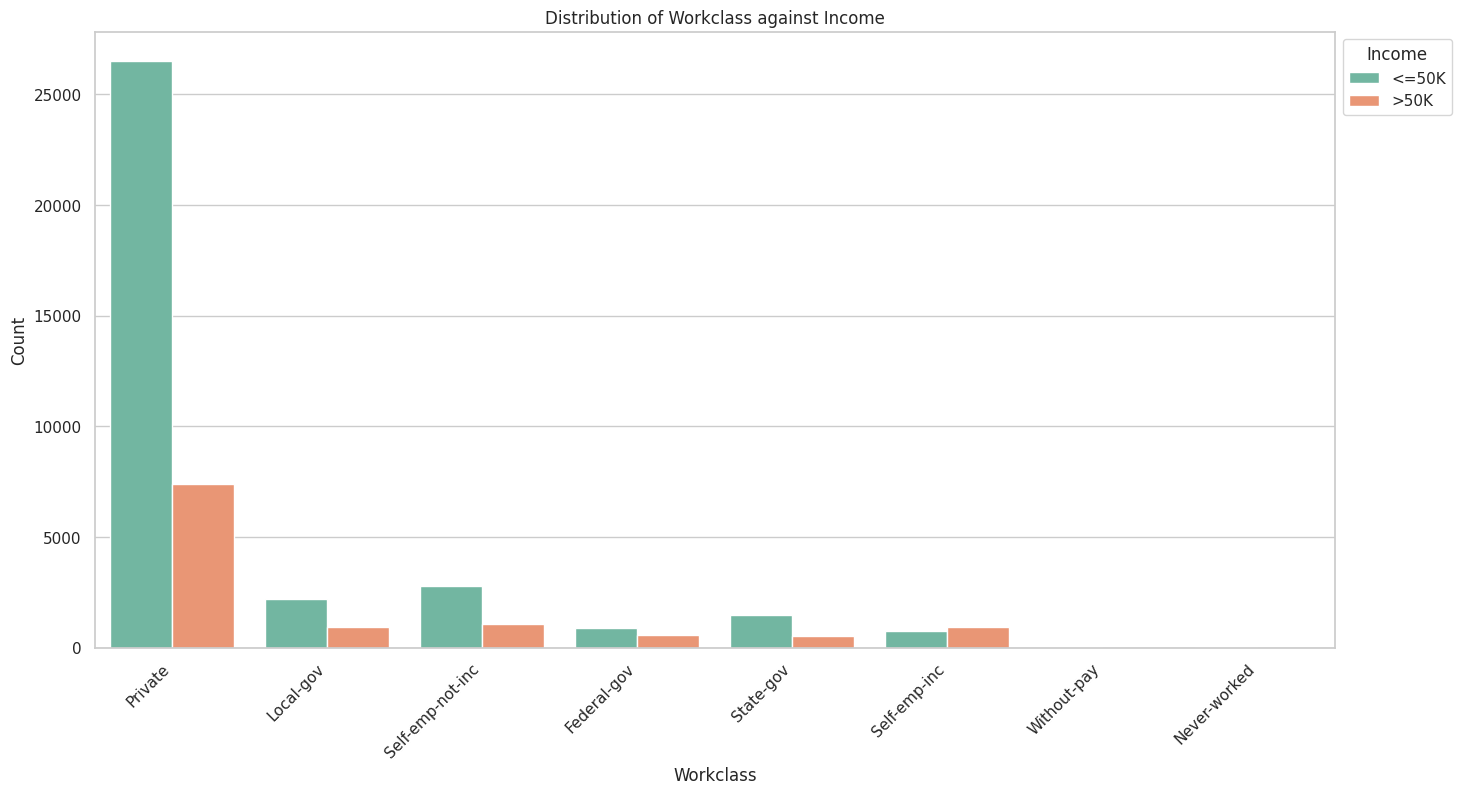

In [ ]:
plt.figure(figsize=(16, 8))

sns.countplot(x="workclass", hue="income", data=df, palette='Set2')

plt.xlabel("Workclass")
plt.ylabel("Count")
plt.title("Distribution of Workclass against Income")

plt.xticks(rotation=45, ha="right")
plt.legend(title="Income", bbox_to_anchor=(1, 1), loc="upper left")
plt.show()

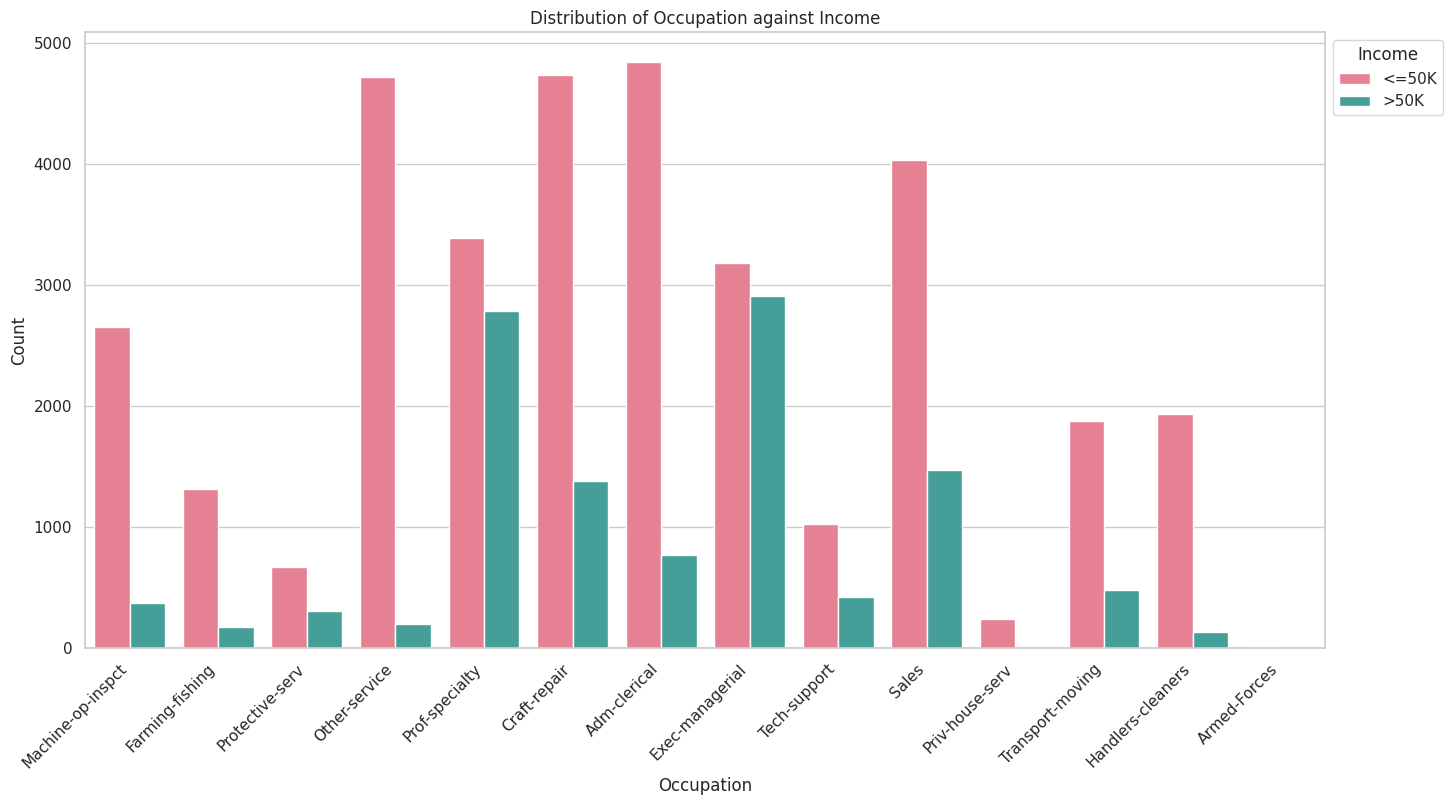

In [ ]:
plt.figure(figsize=(16, 8))

sns.countplot(x="occupation", hue="income", data=df, palette='husl')

plt.xlabel("Occupation")
plt.ylabel("Count")
plt.title("Distribution of Occupation against Income")

plt.xticks(rotation=45, ha="right")
plt.legend(title="Income", bbox_to_anchor=(1, 1), loc="upper left")
plt.show()

In [ ]:
df.loc[(df['occupation'] == 'Tech-support') & (df['education'].isin(['12th', '11th', '10th', '9th', '7th-8th', '5th-6th', '1st-4th', 'preschool']))]


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
1772,56,Private,128696,11th,7,Married-civ-spouse,Tech-support,Wife,Black,Female,0,0,40,United-States,<=50K
7228,53,Private,270655,12th,8,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,45,United-States,>50K
10421,27,Private,384774,7th-8th,4,Divorced,Tech-support,Not-in-family,White,Female,0,0,50,United-States,<=50K
10550,47,Private,151826,10th,6,Divorced,Tech-support,Unmarried,Black,Female,0,0,38,United-States,<=50K
11391,19,Private,273226,11th,7,Never-married,Tech-support,Own-child,White,Male,0,0,40,United-States,<=50K
14996,45,Private,128141,11th,7,Separated,Tech-support,Unmarried,White,Female,0,0,40,Puerto-Rico,<=50K
15232,75,Private,185603,10th,6,Widowed,Tech-support,Not-in-family,White,Female,0,0,32,United-States,<=50K
15640,41,Private,99665,9th,5,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,80,United-States,<=50K
16816,39,Local-gov,207853,12th,8,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,50,United-States,<=50K
18071,30,Federal-gov,188569,9th,5,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,<=50K


this seems like an unrealistic data.

In [ ]:
df = df.drop(df[(df['occupation'] == 'Tech-support') & (df['education'].isin(['12th', '11th', '10th', '9th', '7th-8th', '5th-6th', '1st-4th', 'preschool']))].index)

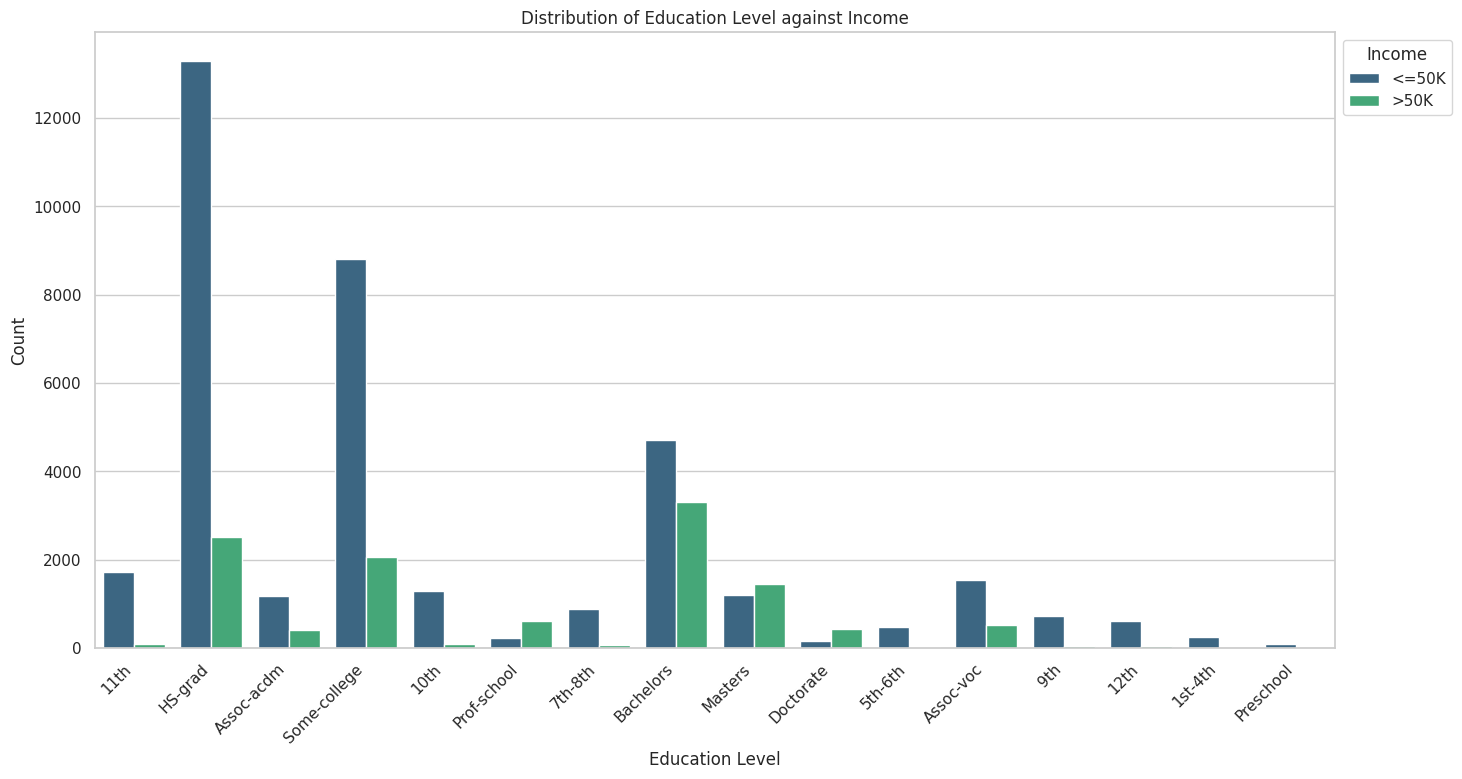

In [ ]:
plt.figure(figsize=(16, 8))

sns.countplot(x="education", hue="income", data=df, palette='viridis')

plt.xlabel("Education Level")
plt.ylabel("Count")
plt.title("Distribution of Education Level against Income")

plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.legend(title="Income", bbox_to_anchor=(1, 1), loc="upper left")
plt.show()

In [ ]:
df.loc[(df['education'] == 'Preschool') & (df['income'] == '>50K')]


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,age_group
15964,61,Private,194804,Preschool,1,Separated,Transport-moving,Not-in-family,Black,Male,14344,0,40,United-States,>50K,55-64


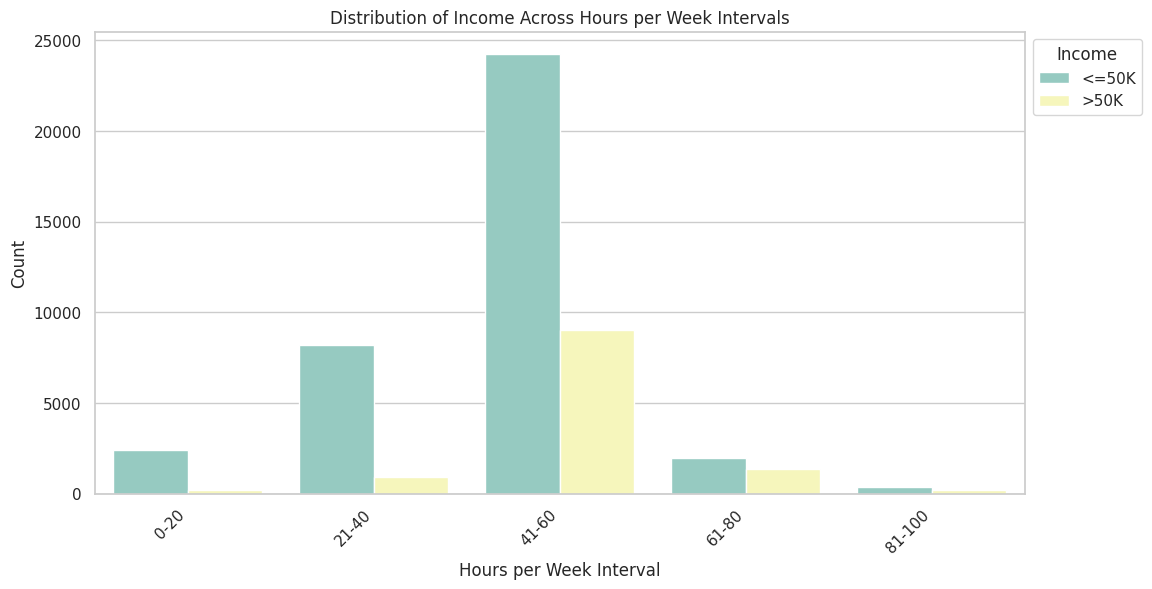

In [ ]:
plt.figure(figsize=(12, 6))

sns.countplot(x="hours_interval", hue="income", data=df, palette='Set3')

plt.xlabel("Hours per Week Interval")
plt.ylabel("Count")
plt.title("Distribution of Income Across Hours per Week Intervals")

plt.xticks(rotation=45, ha="right")
plt.legend(title="Income", bbox_to_anchor=(1, 1), loc="upper left")
plt.show()


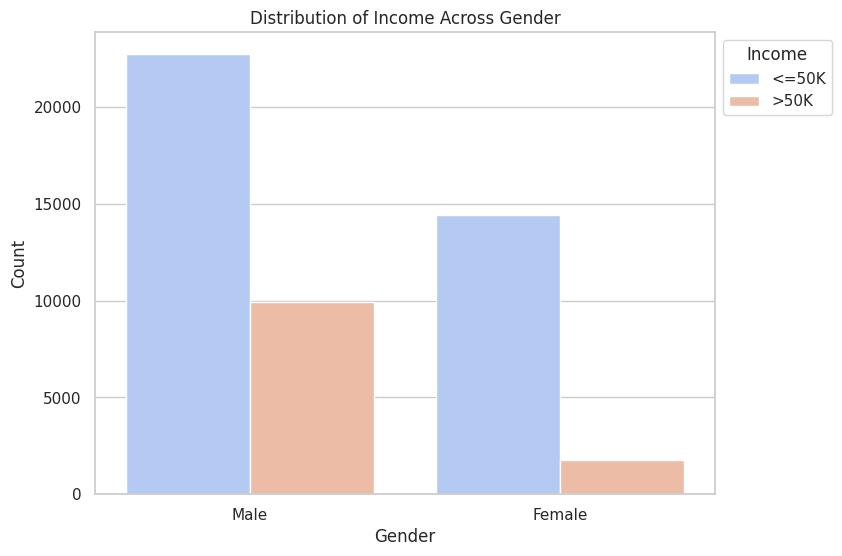

In [ ]:
plt.figure(figsize=(8, 6))

sns.countplot(x="gender", hue="income", data=df, palette='coolwarm')

plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Distribution of Income Across Gender")

plt.legend(title="Income", bbox_to_anchor=(1, 1), loc="upper left")
plt.show()

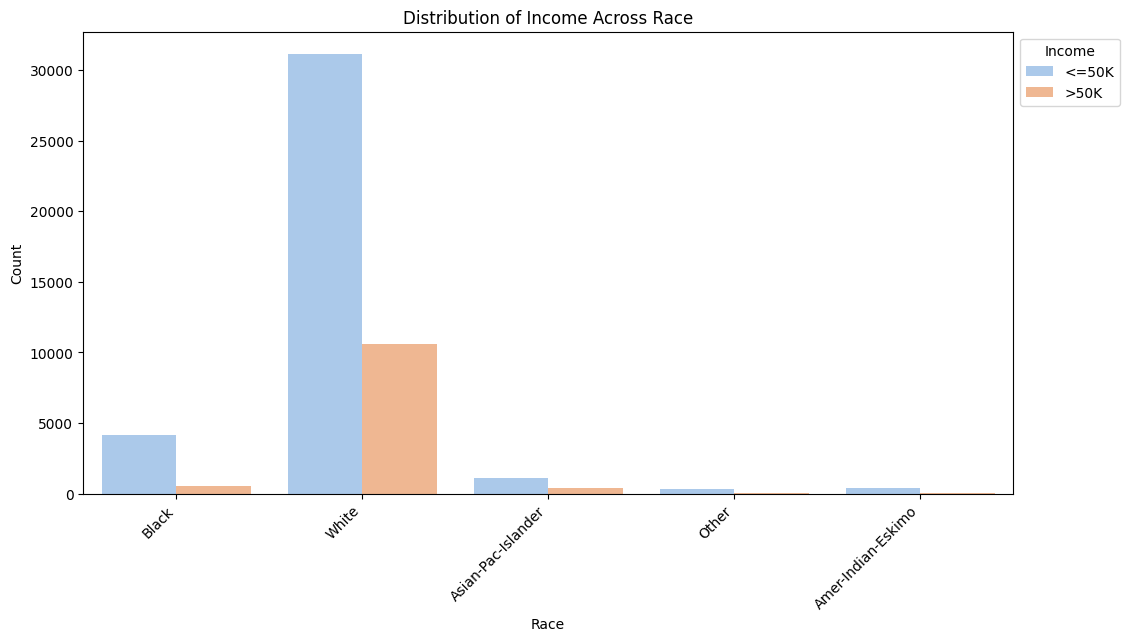

In [ ]:
plt.figure(figsize=(12, 6))

sns.countplot(x="race", hue="income", data=df, palette='pastel')

plt.xlabel("Race")
plt.ylabel("Count")
plt.title("Distribution of Income Across Race")

plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.legend(title="Income", bbox_to_anchor=(1, 1), loc="upper left")
plt.show()

- Population Distribution: The dataset has a larger representation of individuals belonging to the white racial group compared to other racial groups.
- Income Disparity: There appears to be an income disparity among different racial groups, with a higher percentage of individuals from the white racial group earning more than 50K.
- Potential Bias: The dataset might reflect a bias or skewness towards the white population. This could be due to the way the data was collected, the source of the data, or other factors.





<Axes: xlabel='hours-per-week'>

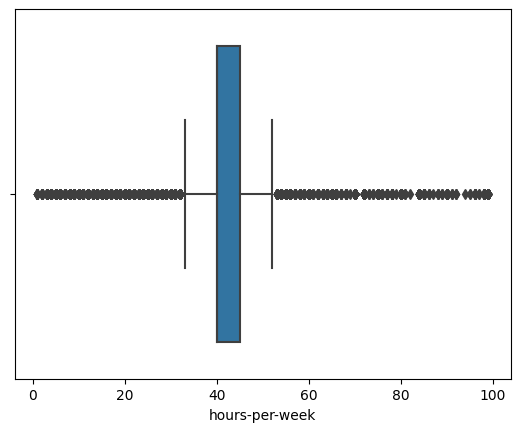

In [ ]:
sns.boxplot(x=df['hours-per-week'])

lets handle these outliers..

In [ ]:
Q1 = df['hours-per-week'].quantile(0.25)
Q3 = df['hours-per-week'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (df['hours-per-week'] < lower_bound) | (df['hours-per-week'] > upper_bound)

print("Median:", df['hours-per-week'].median())
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("Number of Outliers:", outliers.sum())

# Optionally, handle outliers (e.g., replace with median)
df.loc[outliers, 'hours-per-week'] = df['hours-per-week'].median()

Median: 40.0
Lower Bound: 32.5
Upper Bound: 52.5
Number of Outliers: 11899


### Feature Engineering

In [ ]:
df['family_size'] = 0

df.loc[(df['marital-status'] == 'Never-married') & (df['relationship'] == 'Own-child'), 'family_size'] = 2

df.loc[(df['marital-status'] == 'Married-civ-spouse') & (df['relationship'] != 'Own-child'), 'family_size'] = 3

df.loc[(df['marital-status'] == 'Married-AF-spouse') & (df['relationship'] != 'Own-child'), 'family_size'] = 2
df.loc[(df['marital-status'] == 'Married-civ-spouse') & (df['relationship'].isin(['Not-in-family', 'Other-relative'])), 'family_size'] = 2
df.loc[(df['marital-status'] == 'Married-AF-spouse') & (df['relationship'].isin(['Not-in-family', 'Other-relative'])), 'family_size'] = 2

df.loc[(df['marital-status'] == 'Never-married') & (df['relationship'].isin(['Unmarried', 'Not-in-family', 'Other-relative'])), 'family_size'] = 1

df.loc[(df['marital-status'].isin(['Widowed', 'Separated', 'Divorced'])) & (df['relationship'].isin(['Unmarried', 'Not-in-family', 'Other-relative'])), 'family_size'] = 1

df.loc[(df['marital-status'] == 'Married-spouse-absent') & (df['relationship'].isin(['Not-in-family', 'Unmarried', 'Other-relative'])), 'family_size'] = 1

df.loc[(df['marital-status'] == 'Married-spouse-absent') & (df['relationship'] == 'Own-child'), 'family_size'] = 2

df.loc[(df['marital-status'].isin(['Separated', 'Divorced', 'Widowed'])) & (df['relationship'] == 'Own-child'), 'family_size'] = 2



In [ ]:
education_mapping = dict(zip(df['education'], df['educational-num']))
mapping_df = pd.DataFrame({'education': df['education'].unique(), 'educational-num': df['educational-num'].unique()})
mapping_df

,education,educational-num
0,11th,7
1,HS-grad,9
2,Assoc-acdm,12
3,Some-college,10
4,10th,6
5,Prof-school,15
6,7th-8th,4
7,Bachelors,13
8,Masters,14
9,5th-6th,3


If the 'educational-num' column already captures the essential information about the education level in a numeric format, the 'education' column might be redundant.
Redundant columns can sometimes lead to multicollinearity in statistical models, which may impact model performance.

The education_mapping dictionary shows the direct mapping between each education level and its corresponding numerical value. The mapping_df DataFrame displays the unique pairs of education levels and their associated numerical values.

This can serve as evidence of the connection between the categorical education levels and their respective numerical values.

In [ ]:
bins = [0, 21, 45, 65, float('inf')]
labels = ['Young', 'Adult', 'Senior', 'Elderly']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

In [ ]:
status_married = ["Married-civ-spouse", "Married-spouse-absent",
                  "Married-AF-spouse", "Separated"]
#unmarried_status = ["Never-married", "Widowed", "Divorced"]

def func(x):
    if (x in status_married):
        return "Married"
    else:
        return "Unmarried"

df['marital-category'] = df['marital-status'].map(func)

In [ ]:
df['native-country'].value_counts()

United-States                 41292
Mexico                          903
Philippines                     283
Germany                         193
Puerto-Rico                     175
Canada                          163
El-Salvador                     147
India                           147
Cuba                            133
England                         119
China                           113
Jamaica                         103
South                           101
Italy                           100
Dominican-Republic               97
Japan                            89
Guatemala                        86
Vietnam                          83
Columbia                         82
Poland                           81
Haiti                            69
Portugal                         62
Iran                             56
Taiwan                           55
Greece                           49
Nicaragua                        48
Peru                             45
Ecuador                     

Insight: As evident from the data, a substantial majority, around 90%, is comprised of individuals residing in the United States, as indicated by previous research. Therefore, it is logical to categorize this feature into two groups for the purpose of generalization: individuals from the USA (USA) and individuals not from the USA (Other).








In [ ]:
def country_category(c):
  if c == 'United-States':
    return 'USA'
  else:
    return 'others'

df["country-category"] = df['native-country'].map(country_category)

Binary Encoding

- gender
  - male: 0, female: 1
- marital-category
  - unmarried: 0, married: 1
- country-category
  - usa: 1, others: 0

In [ ]:
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})
df['marital-category'] = df['marital-category'].map({'Unmarried':0,'Married':1})
df['country-category'] = df['country-category'].map({'USA': 1, 'others': 0})

In [ ]:
df.drop(['education','relationship','marital-status','native-country'],axis=1,inplace=True)

In [ ]:
insert_index_age = df.columns.get_loc('age') + 1

# Insert the 'age_group' column after the 'age' column
df.insert(insert_index_age, 'age_group', df.pop('age_group'))

# Specify other indices for additional columns if needed
insert_index_marital = df.columns.get_loc('hours-per-week') + 1
insert_index_continent = df.columns.get_loc('capital-loss') + 1
insert_index_country = df.columns.get_loc('gender') + 1

# Insert other columns at their respective indices
# (Note: Replace the column names with the actual column names in your DataFrame)
df.insert(insert_index_marital, 'marital-category', df.pop('marital-category'))
df.insert(insert_index_continent, 'continent', df.pop('continent'))
df.insert(insert_index_country, 'country-category', df.pop('country-category'))

In [ ]:
df['income'] = df['income'].map({"<=50K": 0, ">50K": 1})

<ipython-input-26-50ab3b9c3260>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


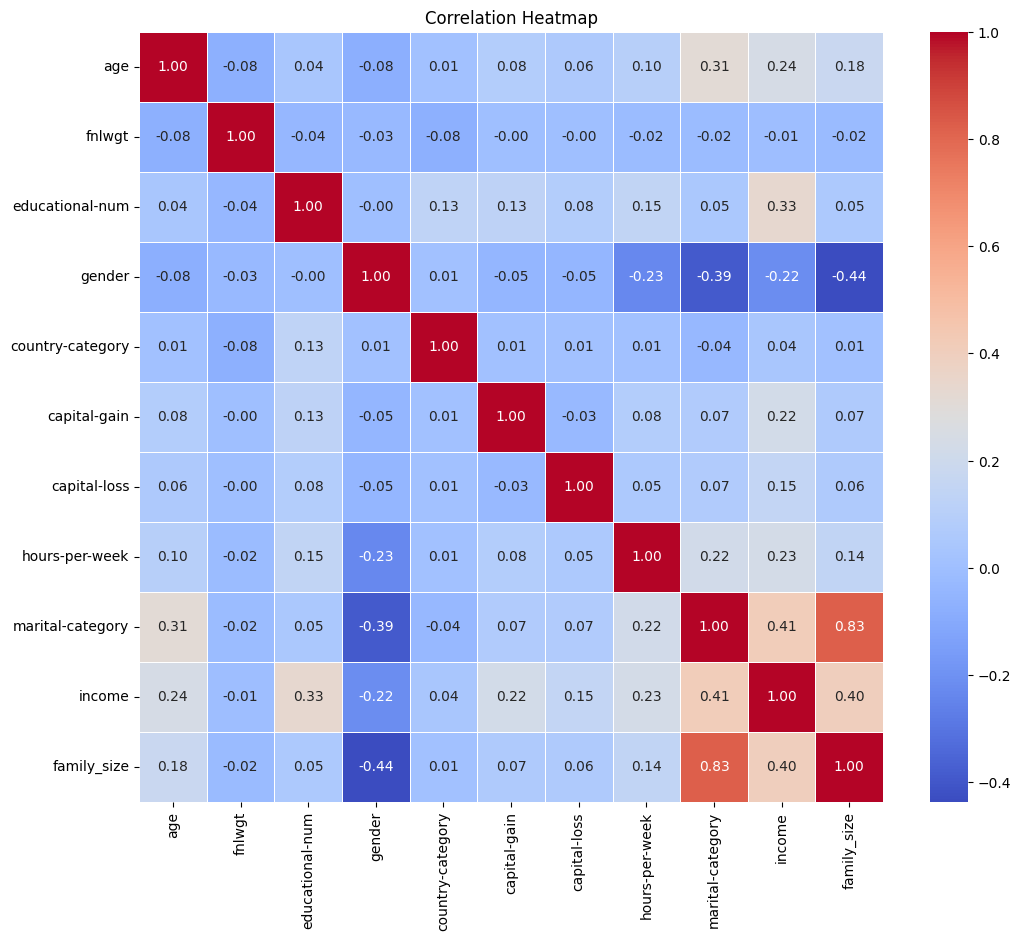

In [ ]:
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
df.drop(['fnlwgt'],axis=1,inplace=True)

Statistical Inference: When analyzing survey data, researchers often want to make inferences about the entire population, not just the observed sample. Applying the final weight helps correct for any biases in the sample, making the analysis more reflective of the entire population.

For many machine learning and data analysis tasks, especially those focused on predicting income or other individual-level outcomes, the "fnlwgt" might not be directly relevant. In such cases, it's common to exclude this variable from the features used for analysis, as it doesn't provide information about an individual's characteristics related to income

In [ ]:
df = pd.get_dummies(df,columns=["race","workclass","occupation","age_group"])
df.head()

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,family_size,marital-category,country-category,...,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,age_group_Young,age_group_Adult,age_group_Senior,age_group_Elderly
0,25,7,0,0,0,40,0,2,0,1,...,0,0,0,0,0,0,0,1,0,0
1,38,9,0,0,0,50,0,3,1,1,...,0,0,0,0,0,0,0,1,0,0
2,28,12,0,0,0,40,1,3,1,1,...,0,0,1,0,0,0,0,1,0,0
3,44,10,0,7688,0,40,1,3,1,1,...,0,0,0,0,0,0,0,1,0,0
5,34,6,0,0,0,30,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0


### Machine Learning model selection and Training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

In [ ]:
x = df.drop(columns=["income"])
y = df["income"]

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
x_train.shape

(36177, 39)

In [ ]:
st = MinMaxScaler()
x_train_scaled = st.fit_transform(x_train)
x_test_scaled = st.fit_transform(x_test)

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(x_train_scaled,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = log_reg.predict(x_test_scaled)

In [ ]:
print("Accuracy: %.3f" % accuracy_score(y_test, y_pred))

Accuracy: 0.845


Text(0.5, 1.0, 'Income distribution')

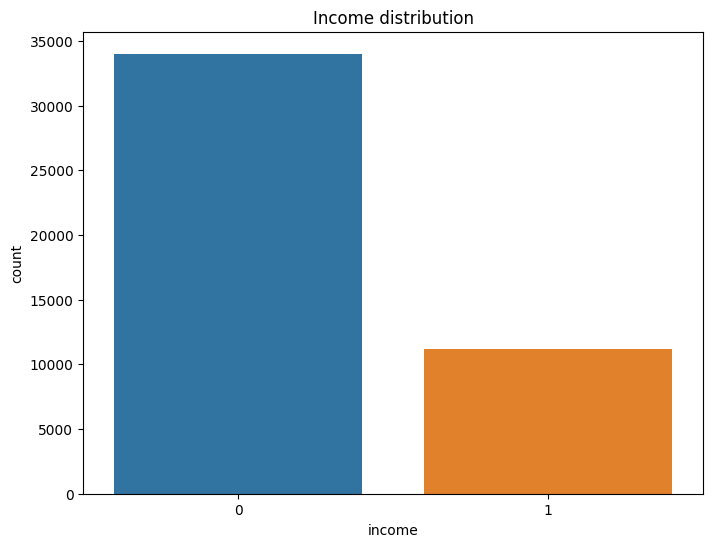

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x = df['income']).set_title("Income distribution")

Insight:
- Accuracy, as a standalone metric, can be misleading in the presence of imbalanced classes. A classifier that predicts the majority class for all instances might still achieve high accuracy, but it's not providing meaningful insights, especially if the goal is to correctly identify instances of the minority class.

- So, if we just look at the accuracy (how often the model is correct), this simple model would seem to be doing well because it's correct about 75.2% of the time.


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[6337  488]
 [ 918 1302]]


In [ ]:
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))

Precision:  0.7273743016759776
Recall:  0.5864864864864865
F1 score:  0.6493765586034912


In [ ]:
def base_models(x_train_scaled, y_train, scoring="roc_auc"):
    print("Base Models....")
    classifiers = [('LR', LogisticRegression()),
                   ("DCT", DecisionTreeClassifier()),
                   ("RF", RandomForestClassifier()),
                   ('Adaboost', AdaBoostClassifier()),
                   ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
                   ]

    for name, classifier in classifiers:
        cv_results = cross_validate(classifier, x_train_scaled, y_train, cv=3, scoring=scoring)
        print(f"{scoring}: {round(cv_results['test_score'].mean(), 4)} ({name}) ")

base_models(x_train_scaled, y_train, scoring="accuracy")

Base Models....


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

accuracy: 0.8442 (LR) 
accuracy: 0.8123 (DCT) 
accuracy: 0.8414 (RF) 
accuracy: 0.8564 (Adaboost) 
accuracy: 0.8676 (XGBoost) 


Since the dataset has imbalanced classes (i.e., a significant difference in the number of instances between classes), accuracy might not be the most informative metric. ROC AUC takes into account both true positive rate (sensitivity) and false positive rate, making it robust for imbalanced datasets.

ROC AUC is particularly relevant for binary classification problems, where you are distinguishing between two classes (positive and negative).



In [ ]:
dt_param_grid = {'criterion': ['gini', 'entropy'],
                 'max_depth': [None, 10, 20, 30],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]}

# Random Forest hyperparameter grid
rf_param_grid = {'max_depth': [8, 15, None],
                 'max_features': [5, 7],
                 'min_samples_split': [15, 20],
                 'n_estimators': [200, 300]}

xgboost_params = {"learning_rate": [0.1, 0.01],
                  "max_depth": [5, 8],
                  "n_estimators": [100, 200]}

adaboost_params = {"n_estimators": [20, 50, 100],
                   "learning_rate": [0.8, 1.0, 1.7]}

In [ ]:
classifiers = [
    ('Random Forest', RandomForestClassifier(), rf_param_grid),
    ('Decision Tree', DecisionTreeClassifier(), dt_param_grid),
    ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss'), xgboost_params),
    ('AdaBoost', AdaBoostClassifier(), adaboost_params)
]

In [ ]:
def hyperparameter_optimization(x_train_scaled, y_train, cv=3, scoring="roc_auc"):
    print("Hyperparameter Tuning....")
    best_models = {}
    for name, classifier, params in classifiers:
        print(f"########## {name} ##########")
        cv_results = cross_validate(classifier, x_train_scaled, y_train, cv=cv, scoring=scoring)
        print(f"{scoring} (Before): {round(cv_results['test_score'].mean(), 4)}")

        gs_best = GridSearchCV(classifier, params, cv=cv, n_jobs=-1, verbose=False).fit(x_train_scaled, y_train)
        final_model = classifier.set_params(**gs_best.best_params_)

        # Train the final model on the full training set
        final_model.fit(x_train_scaled, y_train)

        # Check if the classifier has a feature_importances_ attribute
        if hasattr(final_model, 'feature_importances_'):
            # Assuming your feature names are stored in a list named 'feature_names'
            feature_names = np.array(['age', 'educational-num', 'gender', 'country-category', 'capital-gain',
                                   'capital-loss', 'hours-per-week', 'marital-category', 'family_size',
                                   'race_Amer-Indian-Eskimo', 'race_Asian-Pac-Islander', 'race_Black',
                                   'race_Other', 'race_White', 'workclass_Federal-gov',
                                   'workclass_Local-gov', 'workclass_Private', 'workclass_Self-emp-inc',
                                   'workclass_Self-emp-not-inc', 'workclass_State-gov',
                                   'workclass_Without-pay', 'occupation_Adm-clerical',
                                   'occupation_Armed-Forces', 'occupation_Craft-repair',
                                   'occupation_Exec-managerial', 'occupation_Farming-fishing',
                                   'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
                                   'occupation_Other-service', 'occupation_Priv-house-serv',
                                   'occupation_Prof-specialty', 'occupation_Protective-serv',
                                   'occupation_Sales', 'occupation_Tech-support',
                                   'occupation_Transport-moving', 'age_group_Young', 'age_group_Adult',
                                   'age_group_Senior', 'age_group_Elderly'])
            # Get feature importances
            importances = final_model.feature_importances_

            # Create a dictionary mapping feature names to their importances
            importances_dict = dict(zip(feature_names, importances))

            # Sort the dictionary by importance in descending order
            importances_dict = {k: v for k, v in sorted(importances_dict.items(), key=lambda x: x[1], reverse=True)}

            # Display the sorted feature importances
            print(f"Feature importances for {name}:")
            for feature, importance in importances_dict.items():
                print(f"{feature}: {importance}")
            print("\n")

        cv_results = cross_validate(final_model, x_train_scaled, y_train, cv=cv, scoring=scoring)
        print(f"{scoring} (After): {round(cv_results['test_score'].mean(), 4)}")
        print(f"{name} best params: {gs_best.best_params_}", end="\n\n")
        best_models[name] = final_model

    return best_models

best_models = hyperparameter_optimization(x_train_scaled, y_train)


Hyperparameter Tuning....
########## Random Forest ##########
roc_auc (Before): 0.9177
Feature importances for Random Forest:
country-category: 0.19110198107309878
hours-per-week: 0.17547036569445046
educational-num: 0.14803608335364568
marital-category: 0.1266362165088098
age: 0.07806992783579181
capital-loss: 0.05550846397264865
capital-gain: 0.05163785546539875
occupation_Exec-managerial: 0.03126730682645179
occupation_Prof-specialty: 0.02421939613596144
gender: 0.02147289840448285
occupation_Other-service: 0.01100219998886467
age_group_Senior: 0.0091046834774875
workclass_Self-emp-not-inc: 0.00892965078449322
workclass_Self-emp-inc: 0.005124283802463317
occupation_Farming-fishing: 0.004820674324781308
workclass_Private: 0.004598686045106323
age_group_Adult: 0.004310179735537552
family_size: 0.0038874789015340247
workclass_Federal-gov: 0.0038349842933164107
occupation_Sales: 0.0035798362819661938
occupation_Machine-op-inspct: 0.0032203269094261792
occupation_Craft-repair: 0.00307624

In [ ]:
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score

best_xgboost_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=200, max_depth=5, learning_rate=0.1)
best_xgboost_model.fit(x_train_scaled, y_train)

# Make predictions on the test dataset
test_predictions = best_xgboost_model.predict(x_test_scaled)

# Evaluate on the test dataset
test_score = best_xgboost_model.score(x_test_scaled, y_test)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, test_predictions, average='binary')
roc_auc = roc_auc_score(y_test, test_predictions)

print(f"Accuracy on Test Set: {test_score}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")
print(f"ROC AUC: {roc_auc}")


Accuracy on Test Set: 0.852072968490879
Precision: 0.7450765864332604
Recall: 0.6096687555953447
F1 Score: 0.670605612998523
ROC AUC: 0.7706250105975548


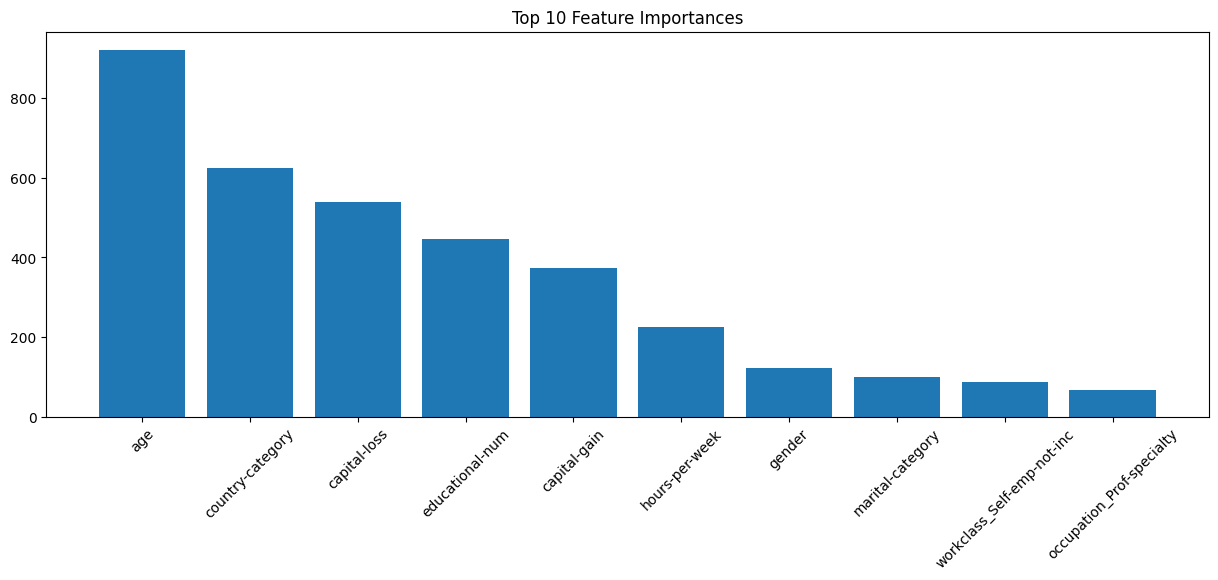

In [ ]:
booster = best_xgboost_model.get_booster()

# Get feature importance scores
importance_scores = booster.get_score(importance_type='weight')

# Map indices to feature names
feature_names = np.array(['age', 'educational-num', 'gender', 'country-category', 'capital-gain',
                           'capital-loss', 'hours-per-week', 'marital-category', 'family_size',
                           'race_Amer-Indian-Eskimo', 'race_Asian-Pac-Islander', 'race_Black',
                           'race_Other', 'race_White', 'workclass_Federal-gov',
                           'workclass_Local-gov', 'workclass_Private', 'workclass_Self-emp-inc',
                           'workclass_Self-emp-not-inc', 'workclass_State-gov',
                           'workclass_Without-pay', 'occupation_Adm-clerical',
                           'occupation_Armed-Forces', 'occupation_Craft-repair',
                           'occupation_Exec-managerial', 'occupation_Farming-fishing',
                           'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
                           'occupation_Other-service', 'occupation_Priv-house-serv',
                           'occupation_Prof-specialty', 'occupation_Protective-serv',
                           'occupation_Sales', 'occupation_Tech-support',
                           'occupation_Transport-moving', 'age_group_Young', 'age_group_Adult',
                           'age_group_Senior', 'age_group_Elderly'])

# Create a list of feature names and their importance scores
feature_importance = [(feature_names[int(index[1:])], importance_scores[index]) for index in importance_scores]

# Sort the feature importance list by scores in descending order
feature_importance.sort(key=lambda x: x[1], reverse=True)

# Display only the top 10 features
top_10_features = feature_importance[:10]

# Plot feature importance for the top 10 features
plt.figure(figsize=(15, 5))
plt.bar(range(len(top_10_features)), [score[1] for score in top_10_features], align="center")
plt.xticks(range(len(top_10_features)), [score[0] for score in top_10_features], rotation=45)
plt.title("Top 10 Feature Importances")
plt.show()